In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt,pi
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import sqrt,pi

def singlerun(ka,phi,L,duration,pa,K,f):
    run=1
    rm=0.005
    kd=ka/K
    Da=1
    D=Da*2
    gamma=0.5772157
    rng = GSLRandomNumberGenerator()
    rng.seed(run)
    factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))
    voxelr=rm*f
    print('l',2*voxelr)
    Pa= 1./(1+(sqrt(3)/2/pi)*(np.log(f*f/12)+(4*pi*D/ka)-2*gamma))            
    td =(2*voxelr)**2/(4*Da)
    H = 3*voxelr*2
    ori = Real3(0.5*H,0,0)
    unit0 = Real3(0,0,L)
    unit1 = Real3(0,L,0)        
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)        
    size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
    Nmv=size[1]*size[2]    
    Area=Nmv*(2*voxelr)**2
    lx,ly,lz=w.actual_lengths()
    Area=ly*lz
    NT=169#int(Nmv*phi)
    NA=NT
    NB=0#int((NT-NA)/2.)10#NT-NA
    if pa=='new':
        ka = Pa*D/factor 
        kap = sqrt(3)*Pa*D
        kd = kap/K
    w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))            
    with species_attributes():
        A |  {'D': str(Da), 'radius':str(voxelr),'location':'M'}
        B |  {'D': str(0), 'radius':str(voxelr),'location':'M'}
    with reaction_rules():#for spa and egfrd
        A + A == B | (ka,kd)
    kD = 4*np.pi*rm*2*D        
    kon = ka*kD/(ka+kD)
    koff = kon/K    
    m2 = get_model()
    w.bind_to(m2)
    w.add_molecules(Species('A'), NA)
    w.add_molecules(Species('B'), NB)
    sim = spatiocyte.SpatiocyteSimulator(w)
    sim.initialize()
    obs = FixedIntervalNumberObserver(0.1,['B'])
    #sim.run(duration,obs)
    #tlogs,nlog=np.array(obs.data()).T   
    return tlogs,nlog,NT,kon,koff,Area
L=1
ka=0.001
phi=1./100
pa='new'
duration =1#500
K=0.001
voxelr=rm*f
f=9
x,y,N,kon,koff,area=singlerun(ka,phi,L,duration,pa,K,f)

No module named 'pint' required by 'ecell4.extra.unit'


n1= 132.75318418009277 n2= 17.62340790995362
17.24375
n1= 132.75318418009277 n2= 17.62340790995362
23.03575


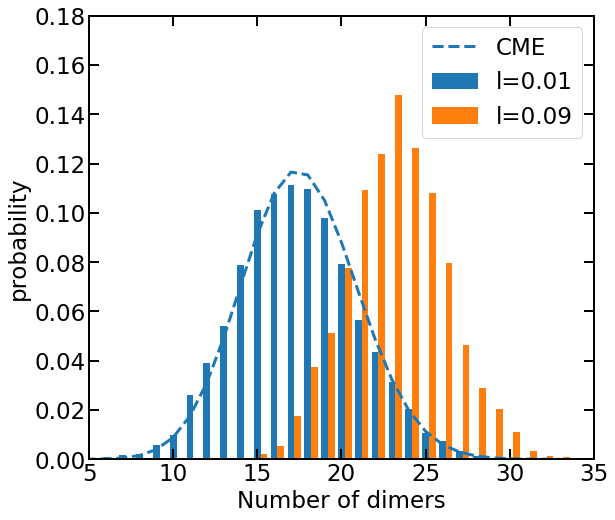

In [2]:
from mpmath import fac,mp
%matplotlib inline
import numpy as np
import math
from math import sqrt,pi
import matplotlib.pyplot as plt
import scipy.special
from mpmath import fac,mp,gamma
mp.dps = 50
mp.pretty=True
N=168
K=0.001
fig,ax=plt.subplots(1,1,figsize=(8.6,7))
fs=23
bw = 0.4
lw=3
kk=0
ratio = 0.25#phiL=1, phic=? percolation threshold
NV=int(N*math.pi/4/ratio)#int(168*3/2.)
Ls=[]
def P(n,k): #cianci paper
    Hu = scipy.special.hyperu(-k/2.,0.5,-1./K/4)
    up = 2**-k*(-1)**(k/2.)*(K)**(n-k/2.)*fac(k)
    down = fac(k-2*n)*fac(n)*Hu
    return up/down
def P2(n,k):
    Hu = scipy.special.hyp2f1(1./2-k/2.,-k/2.,1-k+NV,4.*NV*K)/gamma(1-k+NV)
    up = scipy.special.gamma(1+k)*(K*NV)**n
    down = fac(k-2*n)*fac(n)*Hu*fac(NV+n-k)
    return up/down

for f in [1,9]:
    l=2*0.005*f
    name = '/home/chew/outputdata/2ndpaper/rev2D_K{}_N{}_rvf{}'.format(K,N,f)
    x,y=np.loadtxt(name,delimiter=',')
    n2 = [(1+4*K*N+np.sqrt(8*K*N+1))/8/K, (1+4*K*N-np.sqrt(8*K*N+1))/8/K]
    n1= [N-2*x for x in n2]
    for i,j in zip(n1,n2):
        if all((i>0,j>0)):
            print('n1=',i,'n2=',j)
            men = j
    Nb = y#np.array([int(yy) for yy in y])#/area
    idx = x>100
    print(np.mean(Nb[idx]))
    nn = np.arange(int(min(Nb)),int(max(Nb)),1)
    xx,ff=np.unique(Nb[idx],return_counts=True)
    ff=ff/np.sum(ff)
    ax.bar(xx+bw*kk,ff,bw,label='l='+str(l))
    kk+=1

th = [P(n,N) for n in nn.tolist()]
ax.plot(nn,th,'--',linewidth=lw,label='CME')
ax.set_xlim(5,35)
ax.set_ylim(0,0.18)
ax.set_ylabel('probability',fontsize=fs)
ax.set_xlabel('Number of dimers',fontsize=fs)
plt.legend(fontsize=fs)
ax.tick_params(labelsize=fs)
fig.tight_layout(pad=0)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='both',which='both',direction='in',length=10,width=2)
ax.legend(loc='best',fontsize=fs)
